# Open Stack Cloud Fault Gene Data Analysis
<br>bugdump_critical</br>

In [7]:
import pandas as pd
import numpy as np
import re

In [8]:
#read data

In [9]:
df=pd.read_csv("C:\\Users\\zaina\\Documents\\DataVisulaization_MachineLearning\\OpenStack_Nemat\\bugdump-critical.csv")

In [10]:
sLength = len(df['assignee'])  
assignee_name=pd.Series(str(re.findall('.*~(.*)',str(i))) if len(re.findall('.*~(.*)',str(i)))>0 else 'NA' for i in df.assignee)
df = df.assign(assignee_name=assignee_name.values)
df.head()


,req,bug,version,project,component,fault_class,fault_type,fault_description,fault_symptom,severity,priority,status,mitigation,log,repro,submitter,assignee,created,deployment,assignee_name
0,important servers should have backups,https://bugs.launchpad.net/openstack-ci/+bug/1...,NaN,openstack-ci,NaN,NaN,NaN,cloud image snapshots aren't as reliable as on...,NaN,Critical,NaN,In Progress,NaN,NaN,NaN,https://api.launchpad.net/devel/~corvus,NaN,2012-06-08 18:55:56.257384+00:00,NaN,NA
1,fix-char-dev-permissions,https://bugs.launchpad.net/anvil/+bug/1184013,NaN,anvil,NaN,NaN,NaN,Instead of doing the chmod recommendation for ...,NaN,Critical,NaN,Confirmed,NaN,NaN,NaN,https://api.launchpad.net/devel/~harlowja,NaN,2013-05-24 21:42:21.365222+00:00,NaN,NA
2,stream wrapper only works for default region,https://bugs.launchpad.net/openstack-sdk-php/+...,NaN,openstack-sdk-php,NaN,NaN,NaN,Stream wrappers should work for regions other ...,NaN,Critical,NaN,In Progress,NaN,NaN,NaN,https://api.launchpad.net/devel/~mattfarina,https://api.launchpad.net/devel/~sam-choi,2014-04-03 21:12:46.056397+00:00,NaN,['sam-choi']
3,Keystone client fails to authorize during trus...,https://bugs.launchpad.net/blazar/+bug/1326066,NaN,blazar,NaN,NaN,NaN,The current Keystone client for the V3 API fai...,NaN,Critical,NaN,Fix Committed,NaN,NaN,NaN,https://api.launchpad.net/devel/~pablo-a-fuente,https://api.launchpad.net/devel/~pablo-a-fuente,2014-06-03 17:14:04.753627+00:00,NaN,['pablo-a-fuente']
4,TOSCA translator is missing tests,https://bugs.launchpad.net/heat-translator/+bu...,NaN,heat-translator,NaN,NaN,NaN,There are currently no test cases at all defin...,NaN,Critical,NaN,Fix Committed,NaN,NaN,NaN,https://api.launchpad.net/devel/~thomas-spatzier,https://api.launchpad.net/devel/~ton-i,2014-06-04 08:43:30.334908+00:00,NaN,['ton-i']


In [11]:
#Analyze bugs by status
import re
a=pd.value_counts(df['status'].values, sort=True)
statuscnt=len(a)
y_pos=pd.np.array(map(int,a))
x_pos=pd.np.array(map(str,a.index))

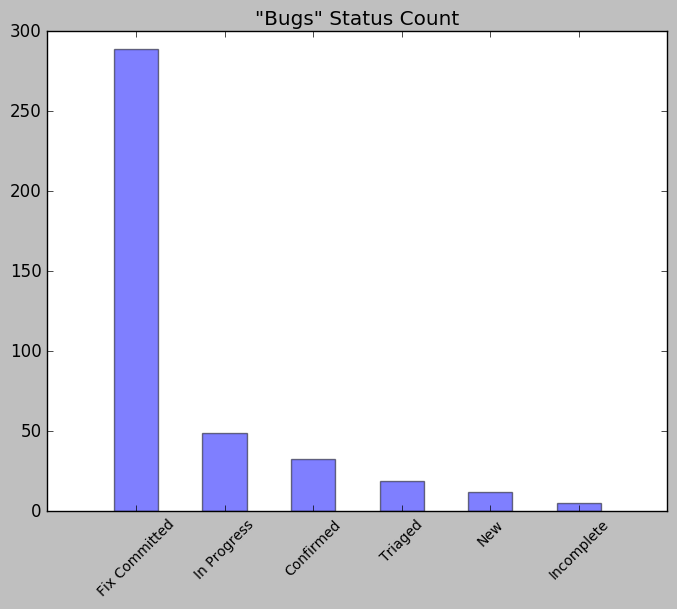

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
x_s = np.arange(len(x_pos)) 
plt.bar(x_s,y_pos, 0.5, align='center',alpha=0.5)
plt.xticks(x_s, x_pos, rotation=45, fontsize=10) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(y_pos)
#plt.setp(x_pos, rotation=45, fontsize=10)
plt.title('"Bugs" Status Count')
plt.show()

In [13]:
#Analyze bugs by Project
a=pd.value_counts(df['project'].values, sort=True)
y_pos=pd.np.array(map(int,a))
y_pos=y_pos[0:10]
x_pos=pd.np.array(map(str,a.index))
x_pos=x_pos[0:10]
print y_pos,x_pos

[197  25  10   9   8   7   7   7   6   6] ['fuel' 'networking-sfc' 'networking-odl' 'kolla' 'glance'
 'devstack-plugin-glusterfs' 'vmware-nsx' 'tripleo' 'networking-cisco'
 'python-manilaclient']


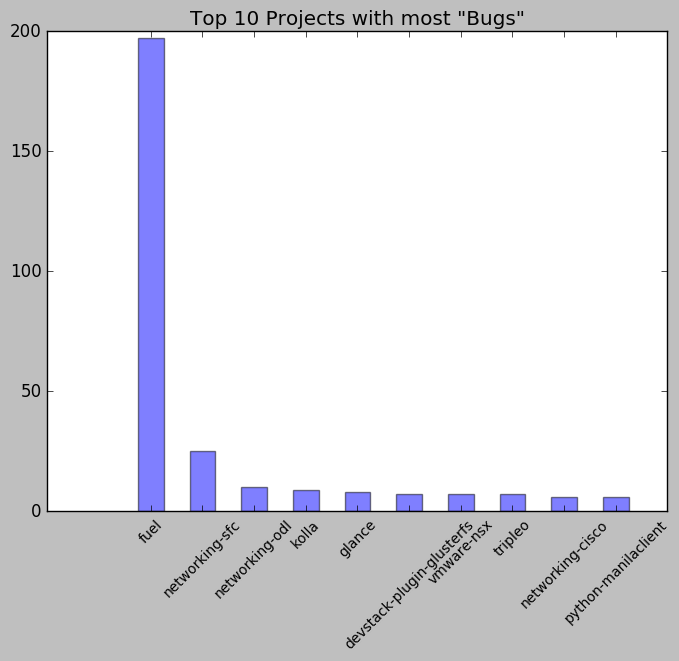

In [14]:
x_s = np.arange(len(x_pos)) 
plt.bar(x_s,y_pos, 0.5, align='center',alpha=0.5)
plt.xticks(x_s, x_pos, rotation=45, fontsize=10) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(y_pos)
#plt.setp(x_pos, rotation=45, fontsize=10)

plt.title('Top 10 Projects with most "Bugs"')
plt.show()

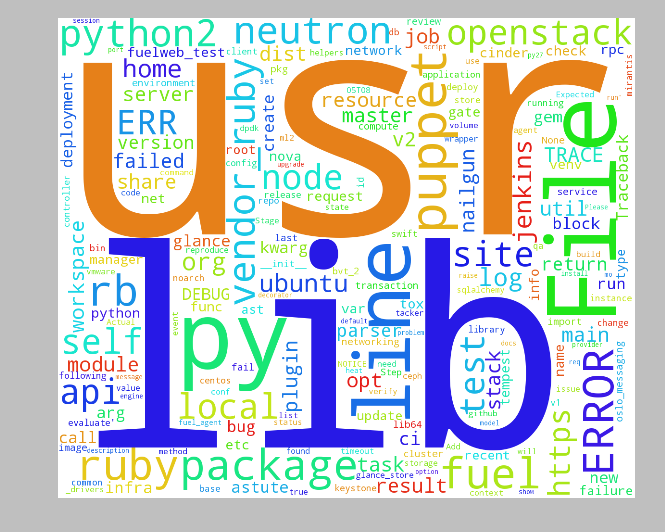

In [17]:
#Analyze fault_description
word_string=''

for i in df.fault_description:
    word_string= word_string+i
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(word_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

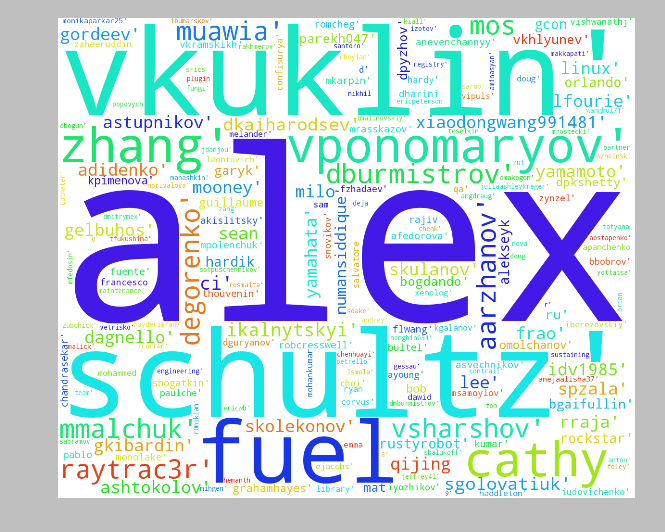

In [20]:
#Analyze Assignee
word_string=''

for i in df.assignee_name:
    if i!='NA':
        word_string= word_string+i
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(word_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()